# Example Notebook for Keysight  Infiniium Oscilloscopes
This notebook is indendet to give an overview over the functions implemented in the QCoDeS driver for the Keysight Infinium Oscilloscopes. The driver has been tested with the MSOS104A.
Please note that the oscilloscopes have plenty of more functions, that have not yet been implemented. Feel free to contribute, request features or report bugs.

In [1]:
%matplotlib inline

### Importing Dependencies

In [1]:
# python imports
import logging
# third party
import matplotlib.pyplot as plt

# qcodes imports
import qcodes as qc
import InfiniiVision as MSO

#setup
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

### Create the Instrument
please insert the right address of your local scope (TCPIP...) you can find the address with the NI-MAX app or within the network settings of the scope.

In [2]:
mso = MSO.Infiniium('MSO', 'USB0::0x0957::0x17A0::MY51500149::INSTR')

Connected to: AGILENT TECHNOLOGIES DSO-X 3104A (serial:MY51500149, firmware:02.41.2015102200) in 0.06s


### Prepare Trace
In this example we are going to acquire the a 100kHz sine wave with 1Vpp from a waveform generator at connected to channel 4 of the scope. Therefore:
 - all the other channels are hidden
 - the time scale is adjusted to allow for one periode
 - the time scale is adjusted to have times starting from zero
 - the range of channel four is set to 1.2V

In [21]:
for i in range(4):
    mso.channels[i].display(False)
mso.ch4.display(True)
mso.timebase_range(2e-5)
mso.timebase_position(5e-3)
mso.ch4.range(5)
mso.ch4.offset(1)

# settings for reflectometry

In [22]:
mso.ch1.display(True)

In [4]:
mso.ch1.range(1)

In [45]:
f_rf=83

In [46]:
mso.timebase_range(1/(2*f_rf))

In [50]:
mso.timebase_position(-1/(4*f_rf))

In [27]:
1/(100*1e3) #100kHz pulse

1e-05

In [32]:
mso.timebase_position(0)

In [33]:
mso.ask(':WAVeform:COUNt?')

'+2'

### Trigger Setup
we want to use the input signal itself as the trigger. Therefor the trigger is first enabled, the trigger source is set and we raise the level to 0.4 V, just for avoiding a boring symmetric function.

In [55]:
#mso.trigger_enabled(True) #undefined header
mso.trigger_edge_source('CHANnel4')
mso.trigger_edge_slope('negative')
mso.ch4.trigger_level(1)

In [35]:
mso.ch4.offset()

2.0

## Data Acquisition
We are going to acquire 100k datapoints with 16bit depth over one periode. So we need a sample rate of 10 MS/s.

In [14]:
#nPoints = 50000; #numeric data not allowed
#mso.acquire_points(nPoints)# this is not settable for DSO, always 50000
#mso.acquire_sample_rate(nPoints/mso.timebase_range()) # this is not setable for DSO always 5GSa/s

In [15]:
mso.ask('WAV:SOUR?') #?important

'CHAN4'

In [55]:
mso.ask(':ACQ:TYPE?')#average?

'NORM'

In [42]:
mso.acquire_mode()

'RTIM'

In [54]:
mso.ask(':ACQ:COUN?')

'65536'

5000000000.0

In [26]:
mso.write(':WAV:POIN 1000')

In [56]:
mso.ask(':WAV:POIN?')

'+1000'

In [4]:
mso.waveform_points()

1000

In [13]:
mso.acquisition_type('AVER')

In [4]:
mso.average_count(2)

It is important to remember to prepare the trace before acquisition.

In [6]:
mso.ch1.trace.prepare_curvedata()

VisaIOError: ('VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.', "writing ':WAVeform:SOURce CHAN1' to <Infiniium: MSO>", "setting MSO_data_source to 'CHAN1'")

In [6]:
mso.average_count(10000)

In [27]:
mso.timeout(20+10000/200)

In [30]:
10000/200

50.0

Then the parameter can be acquire as usual

In [5]:
data = qc.Measure(mso.ch1.trace).run()

TraceNotReady: Please run prepare_curvedata to prepare the scope for acquiring a trace.

The data looks as expected (hopefully)

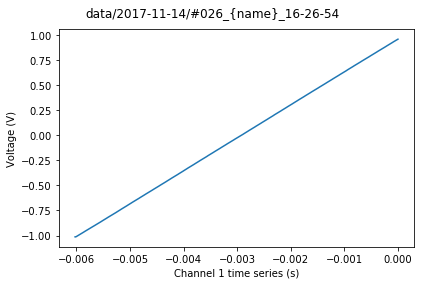

In [11]:
plot = qc.MatPlot(data.arrays['MSO_chan1_trace'])

In [9]:
mso.write(":WAVeform:UNSigned 0")

'0'

In [3]:
mso.ask('CHAN1:IMP?')

'ONEM'

In [3]:
mso.ch1.impedance()

IndexError: ('tuple index out of range', 'getting MSO_chan1_impedance')